Mounted at /content/drive


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import os
from matplotlib import pyplot as plt
import cv2
import numpy as np
import gc
from tqdm import tqdm

In [4]:
data = pd.read_csv('./train_1.csv')
datat = pd.read_csv('./test.csv')
datav = pd.read_csv('./valid.csv')
#data
#datav
datat

,id_code,diagnosis
0,e4dcca36ceb4,0
1,e4e343eaae2a,2
2,e4f12411fd85,4
3,e50b0174690d,0
4,e5197d77ec68,0
...,...,...
361,ffa47f6a7bf4,2
362,ffc04fed30e6,0
363,ffcf7b45f213,2
364,ffd97f8cd5aa,0


In [6]:
print(data.head())
print(data.info())
print(data.describe())


        id_code  diagnosis
0  1ae8c165fd53          2
1  1b329a127307          1
2  1b32e1d775ea          4
3  1b3647865779          0
4  1b398c0494d1          0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id_code    2930 non-null   object
 1   diagnosis  2930 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 45.9+ KB
None
         diagnosis
count  2930.000000
mean      1.131058
std       1.295220
min       0.000000
25%       0.000000
50%       1.000000
75%       2.000000
max       4.000000


<Axes: ylabel='Frequency'>

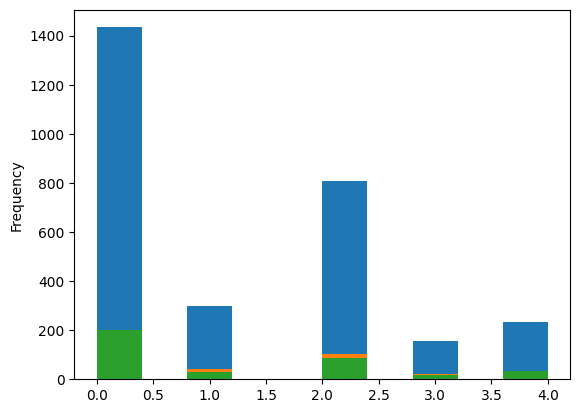

In [7]:
data['diagnosis'].plot(kind='hist')
datav['diagnosis'].plot(kind='hist')
datat['diagnosis'].plot(kind='hist')

In [8]:
import hashlib
import os

def find_and_remove_duplicates(image_folder):
    hashes = set()
    duplicates = []

    for filename in os.listdir(image_folder):
        if filename.endswith(".png"):
            image_path = os.path.join(image_folder, filename)
            with open(image_path, "rb") as f:
                file_hash = hashlib.md5(f.read()).hexdigest()

            if file_hash in hashes:
                duplicates.append(image_path)
            else:
                hashes.add(file_hash)


    print("Duplicate images found:", duplicates)


    for duplicate_path in duplicates:
       os.remove(duplicate_path)


find_and_remove_duplicates("./train_images/train_images")
find_and_remove_duplicates("./test_images/test_images")
find_and_remove_duplicates("./val_images/val_images")

KeyboardInterrupt: 

In [5]:
Train_img = "./train_images/train_images"
Train_csv = "/train_1.csv"
Test_img = "./test_images/test_images"
Test_csv = "./test.csv"
traindf = pd.read_csv(Train_csv,dtype=str)
testdf = pd.read_csv(Test_csv,dtype=str)
validf=pd.read_csv('./valid.csv',dtype=str)



FileNotFoundError: [Errno 2] No such file or directory: '/train_1.csv'

In [10]:
from PIL import Image
import os

def check_image_scales(image_folder):
    for filename in os.listdir(image_folder):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            image_path = os.path.join(image_folder, filename)
            with Image.open(image_path) as img:
                width, height = img.size
                print(f"{filename}: Width={width}, Height={height}")




In [11]:
check_image_scales('./train_images/train_images')

1ae8c165fd53.png: Width=3216, Height=2136
1b329a127307.png: Width=2588, Height=1958
1b32e1d775ea.png: Width=1504, Height=1000
1b3647865779.png: Width=819, Height=614
1b398c0494d1.png: Width=1050, Height=1050
1b4625877527.png: Width=1504, Height=1000
1b495ac025b7.png: Width=2416, Height=1736
1b862fb6f65d.png: Width=1050, Height=1050
1b8701231c8f.png: Width=819, Height=614
1b8ad0afe9fb.png: Width=2588, Height=1958
1bb0ddfe753a.png: Width=2416, Height=1736
1bea04b2bb2d.png: Width=3216, Height=2136
1bf30c84bbad.png: Width=4288, Height=2848
1c0cf251b426.png: Width=2416, Height=1736
1c0e5dd1b14c.png: Width=3216, Height=2136
1c13a1483f4a.png: Width=1050, Height=1050
1c3a6b4449e9.png: Width=2416, Height=1736
1c47815f4a6b.png: Width=1476, Height=1117
1c4d87baaffc.png: Width=2416, Height=1736
1c4f3aa4df06.png: Width=3216, Height=2136
1c578b72d7b3.png: Width=3388, Height=2588
1c5ad36fb799.png: Width=3216, Height=2136
1c5e6cdc7ee1.png: Width=2144, Height=1424
1c6d119c3d70.png: Width=1504, Height=1

KeyboardInterrupt: 

In [ ]:
data.shape

In [15]:
valid_ids = []
for image_id in tqdm(data['id_code']):
    image_path = f'./train_images/train_images/{image_id}.png'
    if os.path.exists(image_path):
        valid_ids.append(image_id)

filtered_data = data[data['id_code'].isin(valid_ids)]
valid_idsv = []
for image_id in tqdm(datav['id_code']):
    image_path = f'./val_images/val_images/{image_id}.png'
    if os.path.exists(image_path):
        valid_idsv.append(image_id)
filtered_datav = datav[datav['id_code'].isin(valid_idsv)]
valid_idst = []
for image_id in tqdm(datat['id_code']):
    image_path = f'./test_images/test_images/{image_id}.png'
    if os.path.exists(image_path):
        valid_idst.append(image_id)
filtered_datat = datat[datat['id_code'].isin(valid_idst)]

filtered_data.to_csv('./trainn.csv', index=False)
filtered_datat.to_csv('./testn.csv', index=False)
filtered_datav.to_csv('./valn.csv', index=False)


100%|██████████| 366/366 [00:00<00:00, 52418.06it/s]


In [8]:
def crop_image_from_gray(img,tol=7):
    if img.ndim ==2:
        mask = img>tol
        return img[np.ix_(mask.any(1),mask.any(0))]
    elif img.ndim==3 :
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        mask = gray_img>tol

        check_shape = img[:,:,0][np.ix_(mask.any(1),mask.any(0))].shape[0]
        if (check_shape == 0):
            return img
        else:
            img1=img[:,:,0][np.ix_(mask.any(1),mask.any(0))]
            img2=img[:,:,1][np.ix_(mask.any(1),mask.any(0))]
            img3=img[:,:,2][np.ix_(mask.any(1),mask.any(0))]
            print(img1.shape,img2.shape,img3.shape)
            img = np.stack([img1,img2,img3],axis=-1)
            print(img.shape)
        return img

In [18]:

import cv2
import numpy as np
from tqdm import tqdm
desired_size=256
N1 = data.shape[0]
x_train1 = np.empty((N1, 256, 256, 3), dtype=np.uint8)
for i, image_id in tqdm(enumerate((data['id_code']))):
    image_path = f'./train_images/train_images/{image_id}.png'
    im = cv2.imread(image_path)
    im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
    im = cv2.resize(im,(desired_size,)*2)
    x_train1[i, :, :, :] = im

2930it [06:27,  7.55it/s]


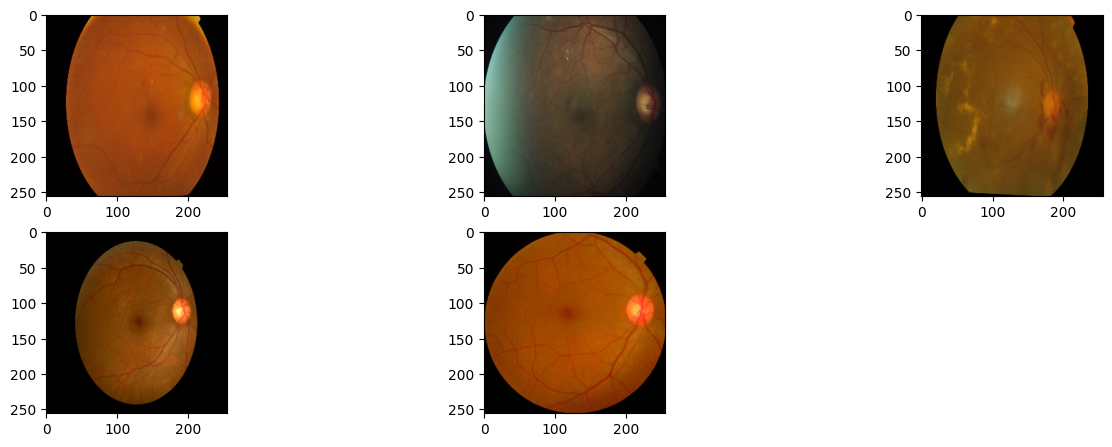

In [19]:
plt.figure(figsize=(16,8))
for i in range(5):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train1[i])

In [6]:

import cv2
import numpy as np
from tqdm import tqdm
def adjust_contrast(image, alpha):
    # alpha is contrast control (1.0-3.0)
    adjusted = cv2.convertScaleAbs(image, alpha=alpha, beta=0)
    return adjusted
def adjust_brightness(image, value):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)

    v = cv2.add(v,value)
    v[v > 255] = 255
    v[v < 0] = 0

    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img

def preprocess_image1(image_path, desired_size=256):

    if not os.path.exists(image_path):
        print(f"Error: File not found - {image_path}")
        return None

    im = cv2.imread(image_path)


    if im is None:
        print(f"Error: Unable to read image - {image_path}")
        return None

    im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
    im = crop_image_from_gray(im)
    im = cv2.resize(im,(desired_size,)*2)
    res = cv2.addWeighted(im,4.5,cv2.GaussianBlur( im , (0,0) , 10) ,-4 ,100)
    return res




In [ ]:
N1 = data.shape[0]
x_train1 = np.empty((N1, 256, 256, 3), dtype=np.uint8)

for i, image_id in tqdm(enumerate((data['id_code']))):
    image_path = f'./train_images/train_images/{image_id}.png'
    processed_image = preprocess_image1(image_path)
    bright_image = adjust_brightness(processed_image, 60)
    bright_image = adjust_contrast(bright_image,0.8 )

    if processed_image is not None:
        x_train1[i, :, :, :] = bright_image

In [23]:
y_train = pd.get_dummies(data['diagnosis']).values

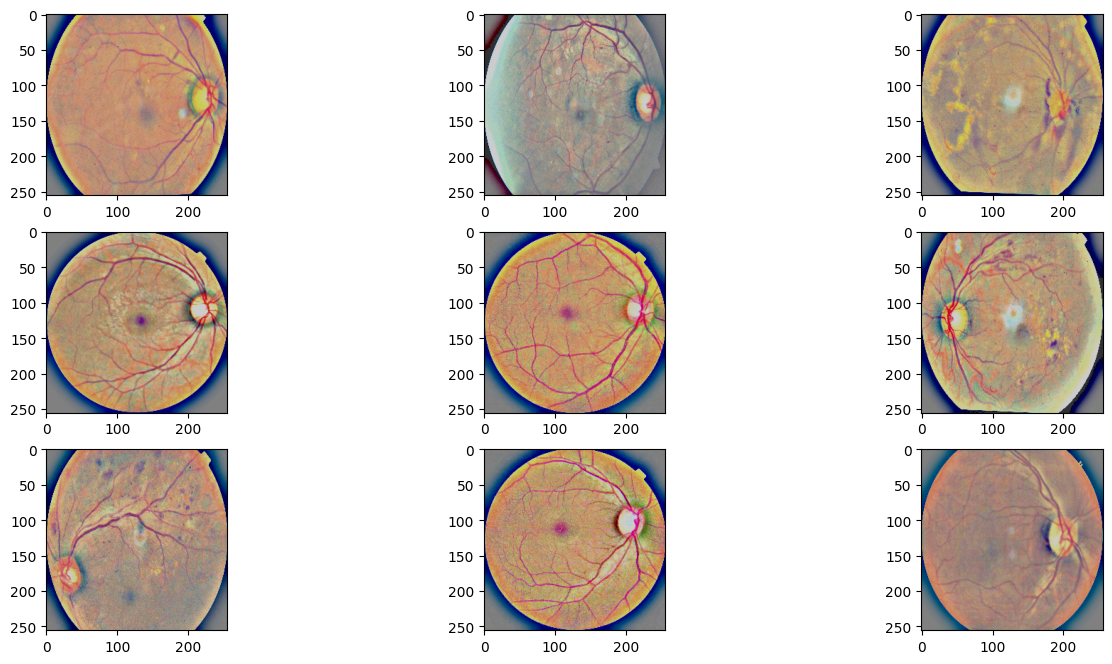

In [24]:
plt.figure(figsize=(16,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train1[i])


In [25]:
y_train_multi = np.empty(y_train.shape, dtype=y_train.dtype)
y_train_multi[:, 4] = y_train[:, 4]

for i in range(3, -1, -1):
    y_train_multi[:, i] = np.logical_or(y_train[:, i], y_train_multi[:, i+1])

print("Original y_train:", y_train.sum(axis=0))
print("Multilabel version:", y_train_multi.sum(axis=0))

Original y_train: [1434  300  808  154  234]
Multilabel version: [2930 1496 1196  388  234]


In [26]:
np.save('y_train1.npy',y_train_multi)
np.save('x_train1.npy',x_train1)

In [38]:
N2 = datat.shape[0]
x_test = np.empty((N2, 256, 256, 3), dtype=np.uint8)

for i, image_id in tqdm(enumerate((datat['id_code']))):
    image_path = f'./test_images/test_images/{image_id}.png'
    processed_image = preprocess_image1(image_path)
    bright_image = adjust_brightness(processed_image, 60)
    bright_image = adjust_contrast(bright_image,0.8 )

    if processed_image is not None:
        x_test[i, :, :, :] = bright_image


2it [00:00,  6.27it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)
(1424, 1806) (1424, 1806) (1424, 1806)
(1424, 1806, 3)


4it [00:00,  5.67it/s]

(1756, 2050) (1756, 2050) (1756, 2050)
(1756, 2050, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


5it [00:00,  6.12it/s]

(614, 760) (614, 760) (614, 760)
(614, 760, 3)
(551, 550) (551, 550) (551, 550)
(551, 550, 3)


7it [00:01,  4.93it/s]

(2136, 2713) (2136, 2713) (2136, 2713)
(2136, 2713, 3)


8it [00:01,  4.69it/s]

(1736, 2259) (1736, 2259) (1736, 2259)
(1736, 2259, 3)


9it [00:01,  4.31it/s]

(1736, 2262) (1736, 2262) (1736, 2262)
(1736, 2262, 3)


12it [00:02,  5.28it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


14it [00:02,  5.78it/s]

(1736, 2260) (1736, 2260) (1736, 2260)
(1736, 2260, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


15it [00:03,  4.30it/s]

(2136, 2722) (2136, 2722) (2136, 2722)
(2136, 2722, 3)
(614, 760) (614, 760) (614, 760)
(614, 760, 3)


19it [00:03,  6.02it/s]

(1375, 1379) (1375, 1379) (1375, 1379)
(1375, 1379, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


20it [00:04,  4.73it/s]

(2136, 2708) (2136, 2708) (2136, 2708)
(2136, 2708, 3)


21it [00:04,  3.85it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


23it [00:05,  3.34it/s]

(1736, 2258) (1736, 2258) (1736, 2258)
(1736, 2258, 3)


24it [00:05,  3.41it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


27it [00:05,  5.11it/s]

(1736, 2259) (1736, 2259) (1736, 2259)
(1736, 2259, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)
(614, 760) (614, 760) (614, 760)
(614, 760, 3)


29it [00:06,  5.36it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


30it [00:06,  4.74it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


31it [00:06,  3.90it/s]

(2136, 2740) (2136, 2740) (2136, 2740)
(2136, 2740, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


33it [00:07,  4.29it/s]

(2136, 2715) (2136, 2715) (2136, 2715)
(2136, 2715, 3)


34it [00:07,  3.97it/s]

(2136, 2722) (2136, 2722) (2136, 2722)
(2136, 2722, 3)


35it [00:07,  3.74it/s]

(2136, 2712) (2136, 2712) (2136, 2712)
(2136, 2712, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)
(1000, 1260) (1000, 1260) (1000, 1260)
(1000, 1260, 3)


40it [00:08,  7.11it/s]

(1736, 2260) (1736, 2260) (1736, 2260)
(1736, 2260, 3)
(552, 551) (552, 551) (552, 551)
(552, 551, 3)
(1000, 1260) (1000, 1260) (1000, 1260)
(1000, 1260, 3)


41it [00:08,  6.04it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


45it [00:09,  7.92it/s]

(1736, 2260) (1736, 2260) (1736, 2260)
(1736, 2260, 3)
(1000, 1261) (1000, 1261) (1000, 1261)
(1000, 1261, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


46it [00:09,  7.25it/s]

(1736, 2260) (1736, 2260) (1736, 2260)
(1736, 2260, 3)


47it [00:09,  5.24it/s]

(2554, 3022) (2554, 3022) (2554, 3022)
(2554, 3022, 3)


48it [00:09,  4.84it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


49it [00:10,  4.32it/s]

(1758, 2049) (1758, 2049) (1758, 2049)
(1758, 2049, 3)


50it [00:10,  4.14it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


51it [00:10,  4.08it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


53it [00:11,  4.74it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(480, 640) (480, 640) (480, 640)
(480, 640, 3)


57it [00:11,  6.85it/s]

(2136, 2720) (2136, 2720) (2136, 2720)
(2136, 2720, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)
(1000, 1260) (1000, 1260) (1000, 1260)
(1000, 1260, 3)


59it [00:11,  8.46it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)
(1378, 1383) (1378, 1383) (1378, 1383)
(1378, 1383, 3)


61it [00:12,  6.90it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


62it [00:12,  4.81it/s]

(2738, 3619) (2738, 3619) (2738, 3619)
(2738, 3619, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


64it [00:12,  5.06it/s]

(2136, 2714) (2136, 2714) (2136, 2714)
(2136, 2714, 3)


67it [00:13,  5.95it/s]

(1736, 2261) (1736, 2261) (1736, 2261)
(1736, 2261, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


69it [00:13,  6.17it/s]

(1736, 2262) (1736, 2262) (1736, 2262)
(1736, 2262, 3)
(1379, 1378) (1379, 1378) (1379, 1378)
(1379, 1378, 3)


72it [00:14,  7.29it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


73it [00:14,  6.65it/s]

(1736, 2260) (1736, 2260) (1736, 2260)
(1736, 2260, 3)


74it [00:14,  5.56it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


75it [00:14,  3.83it/s]

(2732, 3618) (2732, 3618) (2732, 3618)
(2732, 3618, 3)
(1000, 1260) (1000, 1260) (1000, 1260)
(1000, 1260, 3)


77it [00:15,  4.76it/s]

(1736, 2262) (1736, 2262) (1736, 2262)
(1736, 2262, 3)


79it [00:15,  4.42it/s]

(2531, 3027) (2531, 3027) (2531, 3027)
(2531, 3027, 3)
(1380, 1383) (1380, 1383) (1380, 1383)
(1380, 1383, 3)


80it [00:16,  4.35it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


83it [00:16,  5.36it/s]

(2136, 2712) (2136, 2712) (2136, 2712)
(2136, 2712, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


85it [00:16,  7.45it/s]

(614, 760) (614, 760) (614, 760)
(614, 760, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


87it [00:16,  7.89it/s]

(1424, 1806) (1424, 1806) (1424, 1806)
(1424, 1806, 3)
(1736, 2258) (1736, 2258) (1736, 2258)
(1736, 2258, 3)


89it [00:17,  8.30it/s]

(614, 760) (614, 760) (614, 760)
(614, 760, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


91it [00:17,  8.07it/s]

(1736, 2261) (1736, 2261) (1736, 2261)
(1736, 2261, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


93it [00:17,  7.10it/s]

(2136, 2710) (2136, 2710) (2136, 2710)
(2136, 2710, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


95it [00:18,  6.79it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)
(614, 760) (614, 760) (614, 760)
(614, 760, 3)


98it [00:18,  6.74it/s]

(2520, 3035) (2520, 3035) (2520, 3035)
(2520, 3035, 3)
(1736, 2259) (1736, 2259) (1736, 2259)
(1736, 2259, 3)


100it [00:18,  6.04it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


101it [00:19,  5.40it/s]

(2136, 2712) (2136, 2712) (2136, 2712)
(2136, 2712, 3)


102it [00:19,  4.27it/s]

(2136, 2719) (2136, 2719) (2136, 2719)
(2136, 2719, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


106it [00:20,  6.70it/s]

(1736, 2261) (1736, 2261) (1736, 2261)
(1736, 2261, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


108it [00:20,  6.64it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1736, 2259) (1736, 2259) (1736, 2259)


111it [00:20,  8.37it/s]

(1736, 2259, 3)
(553, 552) (553, 552) (553, 552)
(553, 552, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


113it [00:20,  7.79it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(553, 550) (553, 550) (553, 550)
(553, 550, 3)


115it [00:21,  8.23it/s]

(1736, 2265) (1736, 2265) (1736, 2265)
(1736, 2265, 3)
(1736, 2259) (1736, 2259) (1736, 2259)


116it [00:21,  7.59it/s]

(1736, 2259, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)
(614, 760) (614, 760) (614, 760)
(614, 760, 3)


121it [00:21, 10.37it/s]

(1736, 2260) (1736, 2260) (1736, 2260)
(1736, 2260, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)
(614, 760) (614, 760) (614, 760)
(614, 760, 3)


123it [00:21,  9.39it/s]

(1736, 2261) (1736, 2261) (1736, 2261)
(1736, 2261, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


125it [00:22,  7.64it/s]

(2136, 2725) (2136, 2725) (2136, 2725)
(2136, 2725, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)
(552, 551) (552, 551) (552, 551)
(552, 551, 3)


128it [00:22,  8.04it/s]

(2136, 2713) (2136, 2713) (2136, 2713)
(2136, 2713, 3)


129it [00:22,  7.10it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1736, 2257) (1736, 2257) (1736, 2257)


130it [00:23,  6.71it/s]

(1736, 2257, 3)


132it [00:23,  5.94it/s]

(2136, 2710) (2136, 2710) (2136, 2710)
(2136, 2710, 3)
(1379, 1379) (1379, 1379) (1379, 1379)
(1379, 1379, 3)


133it [00:23,  6.31it/s]

(1379, 1381) (1379, 1381) (1379, 1381)
(1379, 1381, 3)
(552, 551) (552, 551) (552, 551)
(552, 551, 3)


135it [00:24,  5.73it/s]

(2534, 3024) (2534, 3024) (2534, 3024)
(2534, 3024, 3)


137it [00:24,  5.71it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1380, 1379) (1380, 1379) (1380, 1379)
(1380, 1379, 3)


139it [00:24,  6.03it/s]

(1736, 2260) (1736, 2260) (1736, 2260)
(1736, 2260, 3)
(1381, 1384) (1381, 1384) (1381, 1384)
(1381, 1384, 3)


142it [00:25,  7.49it/s]

(1736, 2261) (1736, 2261) (1736, 2261)
(1736, 2261, 3)
(552, 551) (552, 551) (552, 551)
(552, 551, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


144it [00:25,  6.69it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1382, 1378) (1382, 1378) (1382, 1378)
(1382, 1378, 3)


148it [00:25,  9.79it/s]

(1736, 2258) (1736, 2258) (1736, 2258)
(1736, 2258, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)
(552, 551) (552, 551) (552, 551)
(552, 551, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


150it [00:26,  8.37it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


154it [00:26,  8.78it/s]

(1736, 2260) (1736, 2260) (1736, 2260)
(1736, 2260, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)
(1378, 1384) (1378, 1384) (1378, 1384)
(1378, 1384, 3)


156it [00:26,  8.67it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)
(1736, 2260) (1736, 2260) (1736, 2260)
(1736, 2260, 3)


158it [00:27,  6.78it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1736, 2257) (1736, 2257) (1736, 2257)
(1736, 2257, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


160it [00:27,  6.66it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


162it [00:27,  5.81it/s]

(2136, 2730) (2136, 2730) (2136, 2730)
(2136, 2730, 3)
(1380, 1379) (1380, 1379) (1380, 1379)
(1380, 1379, 3)


164it [00:28,  6.56it/s]

(1378, 1377) (1378, 1377) (1378, 1377)
(1378, 1377, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


165it [00:28,  5.12it/s]

(2136, 2708) (2136, 2708) (2136, 2708)
(2136, 2708, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


167it [00:28,  6.03it/s]

(1736, 2258) (1736, 2258) (1736, 2258)
(1736, 2258, 3)


168it [00:29,  5.44it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1736, 2258) (1736, 2258) (1736, 2258)


170it [00:29,  5.44it/s]

(1736, 2258, 3)
(1736, 2260) (1736, 2260) (1736, 2260)
(1736, 2260, 3)


171it [00:29,  5.09it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1736, 2261) (1736, 2261) (1736, 2261)
(1736, 2261, 3)


174it [00:29,  7.41it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)
(552, 551) (552, 551) (552, 551)
(552, 551, 3)


176it [00:30,  8.33it/s]

(1736, 2258) (1736, 2258) (1736, 2258)
(1736, 2258, 3)


179it [00:30,  8.92it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(551, 551) (551, 551) (551, 551)
(551, 551, 3)
(1000, 1261) (1000, 1261) (1000, 1261)
(1000, 1261, 3)
(480, 640) (480, 640) (480, 640)
(480, 640, 3)


182it [00:30,  8.75it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1000, 1260) (1000, 1260) (1000, 1260)
(1000, 1260, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


184it [00:31,  7.46it/s]

(2136, 2709) (2136, 2709) (2136, 2709)
(2136, 2709, 3)


187it [00:31,  8.37it/s]

(2136, 2713) (2136, 2713) (2136, 2713)
(2136, 2713, 3)
(614, 760) (614, 760) (614, 760)
(614, 760, 3)
(1000, 1260) (1000, 1260) (1000, 1260)
(1000, 1260, 3)


189it [00:31,  9.29it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)
(1381, 1381) (1381, 1381) (1381, 1381)
(1381, 1381, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


191it [00:31,  9.93it/s]

(1381, 1378) (1381, 1378) (1381, 1378)
(1381, 1378, 3)
(2136, 2716) (2136, 2716) (2136, 2716)
(2136, 2716, 3)


194it [00:32,  7.11it/s]

(2136, 2731) (2136, 2731) (2136, 2731)
(2136, 2731, 3)
(1379, 1382) (1379, 1382) (1379, 1382)
(1379, 1382, 3)


197it [00:32,  7.94it/s]

(2136, 2735) (2136, 2735) (2136, 2735)
(2136, 2735, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


199it [00:33,  9.70it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


201it [00:33,  8.23it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


205it [00:33,  8.14it/s]

(1736, 2257) (1736, 2257) (1736, 2257)
(1736, 2257, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


207it [00:34,  6.77it/s]

(2136, 2717) (2136, 2717) (2136, 2717)
(2136, 2717, 3)
(1380, 1379) (1380, 1379) (1380, 1379)
(1380, 1379, 3)


208it [00:34,  7.07it/s]

(1382, 1378) (1382, 1378) (1382, 1378)
(1382, 1378, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


210it [00:34,  7.45it/s]

(1736, 2259) (1736, 2259) (1736, 2259)
(1736, 2259, 3)


211it [00:34,  6.24it/s]

(2136, 2711) (2136, 2711) (2136, 2711)
(2136, 2711, 3)


213it [00:35,  5.52it/s]

(2136, 2709) (2136, 2709) (2136, 2709)
(2136, 2709, 3)
(1736, 2258) (1736, 2258) (1736, 2258)
(1736, 2258, 3)


216it [00:35,  8.04it/s]

(1379, 1380) (1379, 1380) (1379, 1380)
(1379, 1380, 3)
(553, 552) (553, 552) (553, 552)
(553, 552, 3)
(1379, 1379) (1379, 1379) (1379, 1379)
(1379, 1379, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


218it [00:35,  6.94it/s]

(2136, 2710) (2136, 2710) (2136, 2710)
(2136, 2710, 3)


219it [00:36,  6.07it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


223it [00:36,  7.25it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


224it [00:37,  5.32it/s]

(2525, 3025) (2525, 3025) (2525, 3025)
(2525, 3025, 3)


225it [00:37,  5.25it/s]

(1736, 2260) (1736, 2260) (1736, 2260)
(1736, 2260, 3)
(1736, 2258) (1736, 2258) (1736, 2258)
(1736, 2258, 3)


227it [00:37,  4.82it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


230it [00:38,  5.08it/s]

(2531, 3023) (2531, 3023) (2531, 3023)
(2531, 3023, 3)
(1379, 1377) (1379, 1377) (1379, 1377)
(1379, 1377, 3)
(614, 760) (614, 760) (614, 760)
(614, 760, 3)


233it [00:38,  6.06it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1381, 1381) (1381, 1381) (1381, 1381)
(1381, 1381, 3)


234it [00:39,  4.78it/s]

(2535, 3023) (2535, 3023) (2535, 3023)
(2535, 3023, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


236it [00:39,  5.65it/s]

(1736, 2263) (1736, 2263) (1736, 2263)
(1736, 2263, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


238it [00:39,  6.34it/s]

(1736, 2257) (1736, 2257) (1736, 2257)
(1736, 2257, 3)


239it [00:39,  5.03it/s]

(2136, 2715) (2136, 2715) (2136, 2715)
(2136, 2715, 3)


241it [00:40,  4.77it/s]

(2518, 3034) (2518, 3034) (2518, 3034)
(2518, 3034, 3)
(1378, 1389) (1378, 1389) (1378, 1389)
(1378, 1389, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


243it [00:40,  5.41it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


246it [00:41,  6.24it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1380, 1380) (1380, 1380) (1380, 1380)
(1380, 1380, 3)


248it [00:41,  5.82it/s]

(1736, 2257) (1736, 2257) (1736, 2257)
(1736, 2257, 3)
(1736, 2260) (1736, 2260) (1736, 2260)
(1736, 2260, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


250it [00:41,  5.70it/s]

(2136, 2713) (2136, 2713) (2136, 2713)
(2136, 2713, 3)


252it [00:42,  5.18it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1736, 2260) (1736, 2260) (1736, 2260)
(1736, 2260, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)
(1958, 2588) (1958, 2588) (1958, 2588)


255it [00:42,  6.35it/s]

(1958, 2588, 3)
(1377, 1380) (1377, 1380) (1377, 1380)
(1377, 1380, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


257it [00:43,  5.89it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


259it [00:43,  5.91it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1378, 1387) (1378, 1387) (1378, 1387)
(1378, 1387, 3)


260it [00:43,  4.67it/s]

(2508, 3021) (2508, 3021) (2508, 3021)
(2508, 3021, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


262it [00:44,  5.15it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


264it [00:44,  5.95it/s]

(1736, 2258) (1736, 2258) (1736, 2258)
(1736, 2258, 3)
(1736, 2263) (1736, 2263) (1736, 2263)
(1736, 2263, 3)


267it [00:44,  6.25it/s]

(1736, 2256) (1736, 2256) (1736, 2256)
(1736, 2256, 3)
(1376, 1377) (1376, 1377) (1376, 1377)
(1376, 1377, 3)


268it [00:45,  5.31it/s]

(2136, 2738) (2136, 2738) (2136, 2738)
(2136, 2738, 3)
(1736, 2261) (1736, 2261) (1736, 2261)
(1736, 2261, 3)


269it [00:45,  5.36it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)
(1958, 2588) (1958, 2588) (1958, 2588)


271it [00:45,  5.92it/s]

(1958, 2588, 3)
(554, 552) (554, 552) (554, 552)
(554, 552, 3)
(1736, 2260) (1736, 2260) (1736, 2260)


275it [00:45,  8.48it/s]

(1736, 2260, 3)
(614, 760) (614, 760) (614, 760)
(614, 760, 3)
(614, 760) (614, 760) (614, 760)
(614, 760, 3)


276it [00:46,  6.57it/s]

(2136, 2709) (2136, 2709) (2136, 2709)
(2136, 2709, 3)


277it [00:46,  4.93it/s]

(2532, 3028) (2532, 3028) (2532, 3028)
(2532, 3028, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


279it [00:46,  5.79it/s]

(1751, 2047) (1751, 2047) (1751, 2047)
(1751, 2047, 3)
(553, 551) (553, 551) (553, 551)
(553, 551, 3)


281it [00:47,  5.78it/s]

(2136, 2710) (2136, 2710) (2136, 2710)
(2136, 2710, 3)
(553, 552) (553, 552) (553, 552)
(553, 552, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


286it [00:47,  8.62it/s]

(1736, 2258) (1736, 2258) (1736, 2258)
(1736, 2258, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


288it [00:47,  7.92it/s]

(1379, 1379) (1379, 1379) (1379, 1379)
(1379, 1379, 3)
(1736, 2262) (1736, 2262) (1736, 2262)
(1736, 2262, 3)


289it [00:48,  7.29it/s]

(1736, 2260) (1736, 2260) (1736, 2260)
(1736, 2260, 3)


290it [00:48,  5.80it/s]

(2136, 2710) (2136, 2710) (2136, 2710)
(2136, 2710, 3)


291it [00:48,  5.20it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


292it [00:48,  4.31it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


294it [00:49,  5.15it/s]

(1756, 2050) (1756, 2050) (1756, 2050)
(1756, 2050, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


296it [00:49,  4.80it/s]

(2535, 3031) (2535, 3031) (2535, 3031)
(2535, 3031, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


298it [00:50,  5.26it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


302it [00:50,  6.26it/s]

(2512, 3031) (2512, 3031) (2512, 3031)
(2512, 3031, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)
(1226, 1505) (1226, 1505) (1226, 1505)
(1226, 1505, 3)


304it [00:50,  6.40it/s]

(1226, 1510) (1226, 1510) (1226, 1510)
(1226, 1510, 3)
(1736, 2260) (1736, 2260) (1736, 2260)
(1736, 2260, 3)


306it [00:51,  8.48it/s]

(614, 760) (614, 760) (614, 760)
(614, 760, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


310it [00:51,  9.93it/s]

(1736, 2260) (1736, 2260) (1736, 2260)
(1736, 2260, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)
(552, 551) (552, 551) (552, 551)
(552, 551, 3)


312it [00:51,  7.34it/s]

(2136, 2720) (2136, 2720) (2136, 2720)
(2136, 2720, 3)


313it [00:52,  6.11it/s]

(2136, 2711) (2136, 2711) (2136, 2711)
(2136, 2711, 3)


314it [00:52,  5.45it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


317it [00:52,  6.31it/s]

(2136, 2739) (2136, 2739) (2136, 2739)
(2136, 2739, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)
(1378, 1383) (1378, 1383) (1378, 1383)
(1378, 1383, 3)


318it [00:52,  6.58it/s]

(1377, 1382) (1377, 1382) (1377, 1382)
(1377, 1382, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


320it [00:53,  7.11it/s]

(1736, 2259) (1736, 2259) (1736, 2259)
(1736, 2259, 3)


321it [00:53,  5.93it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


322it [00:53,  4.47it/s]

(2527, 3034) (2527, 3034) (2527, 3034)
(2527, 3034, 3)
(1747, 2048) (1747, 2048) (1747, 2048)


323it [00:54,  4.64it/s]

(1747, 2048, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


327it [00:54,  6.51it/s]

(1736, 2259) (1736, 2259) (1736, 2259)
(1736, 2259, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


328it [00:54,  5.52it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


332it [00:55,  7.15it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)
(1000, 1260) (1000, 1260) (1000, 1260)
(1000, 1260, 3)
(552, 551) (552, 551) (552, 551)
(552, 551, 3)


335it [00:55,  8.45it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)
(1736, 2259) (1736, 2259) (1736, 2259)
(1736, 2259, 3)


337it [00:55,  7.81it/s]

(1736, 2259) (1736, 2259) (1736, 2259)
(1736, 2259, 3)
(1381, 1382) (1381, 1382) (1381, 1382)
(1381, 1382, 3)


340it [00:56,  9.08it/s]

(1379, 1378) (1379, 1378) (1379, 1378)
(1379, 1378, 3)
(968, 1260) (968, 1260) (968, 1260)
(968, 1260, 3)
(1226, 1506) (1226, 1506) (1226, 1506)
(1226, 1506, 3)


341it [00:56,  7.83it/s]

(1736, 2262) (1736, 2262) (1736, 2262)
(1736, 2262, 3)
(614, 759) (614, 759) (614, 759)
(614, 759, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


344it [00:56,  9.01it/s]

(1736, 2264) (1736, 2264) (1736, 2264)
(1736, 2264, 3)
(1736, 2258) (1736, 2258) (1736, 2258)


346it [00:56,  7.90it/s]

(1736, 2258, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


347it [00:57,  6.62it/s]

(1736, 2260) (1736, 2260) (1736, 2260)
(1736, 2260, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


350it [00:57,  6.82it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1381, 1380) (1381, 1380) (1381, 1380)
(1381, 1380, 3)


352it [00:57,  8.43it/s]

(1000, 1261) (1000, 1261) (1000, 1261)
(1000, 1261, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


354it [00:58,  7.04it/s]

(2136, 2726) (2136, 2726) (2136, 2726)
(2136, 2726, 3)
(1379, 1377) (1379, 1377) (1379, 1377)
(1379, 1377, 3)


355it [00:58,  6.54it/s]

(1736, 2260) (1736, 2260) (1736, 2260)
(1736, 2260, 3)


358it [00:58,  7.45it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1000, 1260) (1000, 1260) (1000, 1260)
(1000, 1260, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


360it [00:59,  7.78it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)
(1736, 2260) (1736, 2260) (1736, 2260)
(1736, 2260, 3)


361it [00:59,  8.13it/s]

(1226, 1507) (1226, 1507) (1226, 1507)
(1226, 1507, 3)


363it [00:59,  5.65it/s]

(2528, 3021) (2528, 3021) (2528, 3021)
(2528, 3021, 3)
(1378, 1382) (1378, 1382) (1378, 1382)
(1378, 1382, 3)


364it [00:59,  5.04it/s]

(2136, 2713) (2136, 2713) (2136, 2713)
(2136, 2713, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


366it [01:00,  6.08it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


In [9]:
N3 = datav.shape[0]
x_valid = np.empty((N3, 256, 256, 3), dtype=np.uint8)

for i, image_id in tqdm(enumerate((datav['id_code']))):
    image_path = f'./val_images/val_images/{image_id}.png'
    processed_image = preprocess_image1(image_path)
    bright_image = adjust_brightness(processed_image, 60)
    bright_image = adjust_contrast(bright_image,0.8 )

    if processed_image is not None:
        x_valid[i, :, :, :] = bright_image

1it [00:00,  4.41it/s]

(2136, 2709) (2136, 2709) (2136, 2709)
(2136, 2709, 3)


2it [00:00,  4.42it/s]

(2136, 2715) (2136, 2715) (2136, 2715)
(2136, 2715, 3)
(1736, 2261) (1736, 2261) (1736, 2261)


5it [00:00,  6.96it/s]

(1736, 2261, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)
(1378, 1377) (1378, 1377) (1378, 1377)
(1378, 1377, 3)


6it [00:01,  5.05it/s]

(2536, 3027) (2536, 3027) (2536, 3027)
(2536, 3027, 3)
(1958, 2588) (1958, 2588) (1958, 2588)


7it [00:01,  5.11it/s]

(1958, 2588, 3)
(2136, 2713) (2136, 2713) (2136, 2713)
(2136, 2713, 3)


9it [00:01,  4.71it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


10it [00:02,  4.75it/s]

(1736, 2259) (1736, 2259) (1736, 2259)
(1736, 2259, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


12it [00:02,  5.54it/s]

(1736, 2263) (1736, 2263) (1736, 2263)
(1736, 2263, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)
(1736, 2261) (1736, 2261) (1736, 2261)


14it [00:02,  6.58it/s]

(1736, 2261, 3)


15it [00:02,  5.63it/s]

(2136, 2713) (2136, 2713) (2136, 2713)
(2136, 2713, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


19it [00:03,  7.33it/s]

(2136, 2710) (2136, 2710) (2136, 2710)
(2136, 2710, 3)
(614, 759) (614, 759) (614, 759)
(614, 759, 3)
(1379, 1380) (1379, 1380) (1379, 1380)
(1379, 1380, 3)


21it [00:03,  7.37it/s]

(1000, 1261) (1000, 1261) (1000, 1261)
(1000, 1261, 3)
(1226, 1506) (1226, 1506) (1226, 1506)
(1226, 1506, 3)


22it [00:03,  7.54it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


23it [00:03,  6.56it/s]

(1736, 2261) (1736, 2261) (1736, 2261)
(1736, 2261, 3)


24it [00:04,  4.24it/s]

(2780, 3619) (2780, 3619) (2780, 3619)
(2780, 3619, 3)
(552, 552) (552, 552) (552, 552)
(552, 552, 3)


26it [00:04,  4.82it/s]

(1736, 2258) (1736, 2258) (1736, 2258)
(1736, 2258, 3)


27it [00:05,  4.02it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


29it [00:05,  5.19it/s]

(1380, 1383) (1380, 1383) (1380, 1383)
(1380, 1383, 3)


30it [00:05,  5.00it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


32it [00:05,  5.34it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


35it [00:06,  6.61it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)
(1226, 1509) (1226, 1509) (1226, 1509)
(1226, 1509, 3)


38it [00:06,  7.49it/s]

(2136, 2710) (2136, 2710) (2136, 2710)
(2136, 2710, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


40it [00:06,  6.62it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


41it [00:07,  5.56it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1958, 2588) (1958, 2588) (1958, 2588)


42it [00:07,  5.32it/s]

(1958, 2588, 3)
(1958, 2588) (1958, 2588) (1958, 2588)


43it [00:07,  4.99it/s]

(1958, 2588, 3)


45it [00:08,  4.77it/s]

(2136, 2708) (2136, 2708) (2136, 2708)
(2136, 2708, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


46it [00:08,  3.59it/s]

(2750, 3623) (2750, 3623) (2750, 3623)
(2750, 3623, 3)


47it [00:08,  3.45it/s]

(2136, 2714) (2136, 2714) (2136, 2714)
(2136, 2714, 3)


48it [00:09,  3.70it/s]

(1958, 2587) (1958, 2587) (1958, 2587)
(1958, 2587, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


50it [00:09,  5.02it/s]

(1736, 2258) (1736, 2258) (1736, 2258)
(1736, 2258, 3)


51it [00:09,  3.89it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


52it [00:10,  3.33it/s]

(2529, 3028) (2529, 3028) (2529, 3028)
(2529, 3028, 3)


53it [00:10,  3.47it/s]

(2136, 2713) (2136, 2713) (2136, 2713)
(2136, 2713, 3)


54it [00:10,  3.52it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


55it [00:11,  3.34it/s]

(2136, 2714) (2136, 2714) (2136, 2714)
(2136, 2714, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


57it [00:11,  4.35it/s]

(1736, 2256) (1736, 2256) (1736, 2256)
(1736, 2256, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


59it [00:11,  5.30it/s]

(1736, 2260) (1736, 2260) (1736, 2260)
(1736, 2260, 3)


60it [00:11,  4.76it/s]

(1736, 2261) (1736, 2261) (1736, 2261)
(1736, 2261, 3)
(552, 551) (552, 551) (552, 551)
(552, 551, 3)


64it [00:12,  5.94it/s]

(2136, 2714) (2136, 2714) (2136, 2714)
(2136, 2714, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)
(553, 551) (553, 551) (553, 551)
(553, 551, 3)


65it [00:12,  5.30it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(614, 760) (614, 760) (614, 760)
(614, 760, 3)


67it [00:13,  5.73it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


70it [00:13,  7.10it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


71it [00:13,  6.21it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1736, 2258) (1736, 2258) (1736, 2258)
(1736, 2258, 3)


73it [00:14,  5.86it/s]

(1736, 2258) (1736, 2258) (1736, 2258)
(1736, 2258, 3)


74it [00:14,  4.96it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


75it [00:14,  4.79it/s]

(1736, 2259) (1736, 2259) (1736, 2259)
(1736, 2259, 3)


76it [00:14,  4.82it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)
(480, 640) (480, 640) (480, 640)
(480, 640, 3)
(552, 552) (552, 552) (552, 552)
(552, 552, 3)


79it [00:15,  5.39it/s]

(2525, 3024) (2525, 3024) (2525, 3024)
(2525, 3024, 3)
(1380, 1379) (1380, 1379) (1380, 1379)
(1380, 1379, 3)


81it [00:15,  5.18it/s]

(1736, 2259) (1736, 2259) (1736, 2259)
(1736, 2259, 3)


82it [00:15,  5.03it/s]

(1766, 2052) (1766, 2052) (1766, 2052)
(1766, 2052, 3)


83it [00:16,  3.67it/s]

(2782, 3622) (2782, 3622) (2782, 3622)
(2782, 3622, 3)
(552, 551) (552, 551) (552, 551)
(552, 551, 3)


85it [00:16,  4.43it/s]

(2136, 2712) (2136, 2712) (2136, 2712)
(2136, 2712, 3)


87it [00:17,  4.98it/s]

(1379, 1378) (1379, 1378) (1379, 1378)
(1379, 1378, 3)
(1379, 1378) (1379, 1378) (1379, 1378)
(1379, 1378, 3)


89it [00:17,  5.96it/s]

(1736, 2260) (1736, 2260) (1736, 2260)
(1736, 2260, 3)
(1226, 1505) (1226, 1505) (1226, 1505)
(1226, 1505, 3)


91it [00:17,  5.46it/s]

(2136, 2712) (2136, 2712) (2136, 2712)
(2136, 2712, 3)
(1424, 1805) (1424, 1805) (1424, 1805)
(1424, 1805, 3)


93it [00:17,  7.00it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)
(1380, 1379) (1380, 1379) (1380, 1379)
(1380, 1379, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


95it [00:18,  8.75it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


97it [00:18,  7.25it/s]

(1958, 2587) (1958, 2587) (1958, 2587)
(1958, 2587, 3)
(1380, 1379) (1380, 1379) (1380, 1379)
(1380, 1379, 3)


98it [00:18,  5.98it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


99it [00:18,  5.44it/s]

(1958, 2587) (1958, 2587) (1958, 2587)
(1958, 2587, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


101it [00:19,  5.66it/s]

(2136, 2712) (2136, 2712) (2136, 2712)
(2136, 2712, 3)


103it [00:19,  5.43it/s]

(2136, 2711) (2136, 2711) (2136, 2711)
(2136, 2711, 3)
(1380, 1395) (1380, 1395) (1380, 1395)
(1380, 1395, 3)


104it [00:20,  4.41it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(552, 551) (552, 551) (552, 551)
(552, 551, 3)


106it [00:20,  5.10it/s]

(2136, 2713) (2136, 2713) (2136, 2713)
(2136, 2713, 3)
(1736, 2259) (1736, 2259) (1736, 2259)
(1736, 2259, 3)


110it [00:20,  7.99it/s]

(553, 551) (553, 551) (553, 551)
(553, 551, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)
(1226, 1506) (1226, 1506) (1226, 1506)
(1226, 1506, 3)


111it [00:21,  5.81it/s]

(2533, 3025) (2533, 3025) (2533, 3025)
(2533, 3025, 3)


112it [00:21,  5.27it/s]

(2136, 2713) (2136, 2713) (2136, 2713)
(2136, 2713, 3)


113it [00:21,  5.04it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


115it [00:21,  5.47it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


118it [00:22,  6.83it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


120it [00:22,  7.21it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)
(1379, 1383) (1379, 1383) (1379, 1383)
(1379, 1383, 3)


121it [00:23,  4.67it/s]

(2742, 3621) (2742, 3621) (2742, 3621)
(2742, 3621, 3)
(1380, 1380) (1380, 1380) (1380, 1380)


122it [00:23,  4.95it/s]

(1380, 1380, 3)
(1736, 2257) (1736, 2257) (1736, 2257)


123it [00:23,  4.81it/s]

(1736, 2257, 3)


124it [00:23,  3.67it/s]

(2514, 3034) (2514, 3034) (2514, 3034)
(2514, 3034, 3)


125it [00:24,  3.58it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


126it [00:24,  3.62it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


128it [00:25,  3.57it/s]

(2784, 3618) (2784, 3618) (2784, 3618)
(2784, 3618, 3)
(1377, 1379) (1377, 1379) (1377, 1379)
(1377, 1379, 3)


129it [00:25,  3.82it/s]

(1376, 1379) (1376, 1379) (1376, 1379)
(1376, 1379, 3)


130it [00:25,  3.82it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


133it [00:26,  4.94it/s]

(2136, 2717) (2136, 2717) (2136, 2717)
(2136, 2717, 3)
(1379, 1376) (1379, 1376) (1379, 1376)
(1379, 1376, 3)


134it [00:26,  4.97it/s]

(1736, 2262) (1736, 2262) (1736, 2262)
(1736, 2262, 3)


135it [00:26,  4.68it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


136it [00:26,  3.62it/s]

(2531, 3027) (2531, 3027) (2531, 3027)
(2531, 3027, 3)


139it [00:27,  5.92it/s]

(1736, 2259) (1736, 2259) (1736, 2259)
(1736, 2259, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


141it [00:27,  6.11it/s]

(1736, 2263) (1736, 2263) (1736, 2263)
(1736, 2263, 3)
(1379, 1377) (1379, 1377) (1379, 1377)
(1379, 1377, 3)


142it [00:27,  4.79it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


145it [00:28,  5.80it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1379, 1379) (1379, 1379) (1379, 1379)
(1379, 1379, 3)
(1000, 1260) (1000, 1260) (1000, 1260)
(1000, 1260, 3)
(1736, 2258) (1736, 2258) (1736, 2258)
(1736, 2258, 3)


148it [00:28,  5.48it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


150it [00:29,  5.31it/s]

(2136, 2720) (2136, 2720) (2136, 2720)
(2136, 2720, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


152it [00:29,  5.35it/s]

(2136, 2713) (2136, 2713) (2136, 2713)
(2136, 2713, 3)
(614, 760) (614, 760) (614, 760)
(614, 760, 3)
(614, 760) (614, 760) (614, 760)
(614, 760, 3)


157it [00:30,  8.37it/s]

(1375, 1378) (1375, 1378) (1375, 1378)
(1375, 1378, 3)
(614, 760) (614, 760) (614, 760)
(614, 760, 3)
(1382, 1378) (1382, 1378) (1382, 1378)
(1382, 1378, 3)


158it [00:30,  7.38it/s]

(1736, 2261) (1736, 2261) (1736, 2261)
(1736, 2261, 3)


159it [00:30,  6.10it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1226, 1510) (1226, 1510) (1226, 1510)
(1226, 1510, 3)


160it [00:30,  6.04it/s]

(552, 550) (552, 550) (552, 550)
(552, 550, 3)


162it [00:31,  6.15it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1736, 2258) (1736, 2258) (1736, 2258)


163it [00:31,  5.80it/s]

(1736, 2258, 3)


164it [00:31,  4.86it/s]

(2136, 2718) (2136, 2718) (2136, 2718)
(2136, 2718, 3)
(1000, 1260) (1000, 1260) (1000, 1260)
(1000, 1260, 3)


166it [00:31,  5.37it/s]

(1736, 2259) (1736, 2259) (1736, 2259)
(1736, 2259, 3)


167it [00:32,  3.69it/s]

(2736, 3617) (2736, 3617) (2736, 3617)
(2736, 3617, 3)


168it [00:32,  4.13it/s]

(1379, 1381) (1379, 1381) (1379, 1381)
(1379, 1381, 3)


169it [00:32,  3.77it/s]

(2136, 2709) (2136, 2709) (2136, 2709)
(2136, 2709, 3)
(553, 551) (553, 551) (553, 551)
(553, 551, 3)


172it [00:33,  4.75it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1379, 1382) (1379, 1382) (1379, 1382)
(1379, 1382, 3)
(614, 760) (614, 760) (614, 760)
(614, 760, 3)


174it [00:33,  5.63it/s]

(1736, 2262) (1736, 2262) (1736, 2262)
(1736, 2262, 3)
(614, 760) (614, 760) (614, 760)
(614, 760, 3)


177it [00:34,  6.21it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1380, 1379) (1380, 1379) (1380, 1379)
(1380, 1379, 3)


178it [00:34,  5.39it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


180it [00:34,  6.52it/s]

(1375, 1377) (1375, 1377) (1375, 1377)
(1375, 1377, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


182it [00:34,  5.90it/s]

(2136, 2721) (2136, 2721) (2136, 2721)
(2136, 2721, 3)
(614, 760) (614, 760) (614, 760)
(614, 760, 3)
(1379, 1387) (1379, 1387) (1379, 1387)


184it [00:35,  7.11it/s]

(1379, 1387, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)
(1379, 1379) (1379, 1379) (1379, 1379)


186it [00:35,  7.74it/s]

(1379, 1379, 3)


187it [00:35,  5.87it/s]

(1736, 2261) (1736, 2261) (1736, 2261)
(1736, 2261, 3)
(552, 551) (552, 551) (552, 551)
(552, 551, 3)


189it [00:35,  6.47it/s]

(1736, 2258) (1736, 2258) (1736, 2258)
(1736, 2258, 3)


190it [00:36,  5.88it/s]

(1736, 2258) (1736, 2258) (1736, 2258)
(1736, 2258, 3)


192it [00:36,  6.03it/s]

(1736, 2259) (1736, 2259) (1736, 2259)
(1736, 2259, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


193it [00:37,  3.80it/s]

(2740, 3617) (2740, 3617) (2740, 3617)
(2740, 3617, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


195it [00:37,  4.99it/s]

(1381, 1383) (1381, 1383) (1381, 1383)
(1381, 1383, 3)


196it [00:37,  4.40it/s]

(2136, 2713) (2136, 2713) (2136, 2713)
(2136, 2713, 3)


197it [00:38,  3.74it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


200it [00:38,  4.02it/s]

(2744, 3617) (2744, 3617) (2744, 3617)
(2744, 3617, 3)
(1380, 1380) (1380, 1380) (1380, 1380)
(1380, 1380, 3)


201it [00:39,  3.19it/s]

(2781, 3621) (2781, 3621) (2781, 3621)
(2781, 3621, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


203it [00:39,  3.47it/s]

(2536, 3028) (2536, 3028) (2536, 3028)
(2536, 3028, 3)


204it [00:39,  3.72it/s]

(1736, 2262) (1736, 2262) (1736, 2262)
(1736, 2262, 3)


205it [00:40,  3.72it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


206it [00:40,  3.91it/s]

(1736, 2258) (1736, 2258) (1736, 2258)
(1736, 2258, 3)
(553, 551) (553, 551) (553, 551)
(553, 551, 3)


208it [00:40,  4.77it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


209it [00:41,  4.34it/s]

(1736, 2261) (1736, 2261) (1736, 2261)
(1736, 2261, 3)
(1736, 2261) (1736, 2261) (1736, 2261)


210it [00:41,  4.40it/s]

(1736, 2261, 3)


211it [00:41,  4.03it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(614, 760) (614, 760) (614, 760)
(614, 760, 3)


213it [00:41,  4.80it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


215it [00:42,  4.93it/s]

(2136, 2711) (2136, 2711) (2136, 2711)
(2136, 2711, 3)
(1226, 1505) (1226, 1505) (1226, 1505)
(1226, 1505, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)
(1736, 2256) (1736, 2256) (1736, 2256)


219it [00:42,  7.83it/s]

(1736, 2256, 3)
(552, 551) (552, 551) (552, 551)
(552, 551, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)
(1736, 2262) (1736, 2262) (1736, 2262)
(1736, 2262, 3)


222it [00:43,  6.55it/s]

(1736, 2259) (1736, 2259) (1736, 2259)
(1736, 2259, 3)
(1380, 1379) (1380, 1379) (1380, 1379)
(1380, 1379, 3)


223it [00:43,  5.12it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1736, 2258) (1736, 2258) (1736, 2258)


224it [00:43,  5.07it/s]

(1736, 2258, 3)


225it [00:44,  4.64it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


227it [00:44,  5.98it/s]

(1380, 1381) (1380, 1381) (1380, 1381)
(1380, 1381, 3)


228it [00:44,  4.52it/s]

(2519, 3024) (2519, 3024) (2519, 3024)
(2519, 3024, 3)


229it [00:44,  4.07it/s]

(2136, 2746) (2136, 2746) (2136, 2746)
(2136, 2746, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


231it [00:45,  3.83it/s]

(2732, 3623) (2732, 3623) (2732, 3623)
(2732, 3623, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


233it [00:45,  5.13it/s]

(1226, 1508) (1226, 1508) (1226, 1508)
(1226, 1508, 3)


234it [00:45,  4.76it/s]

(1736, 2260) (1736, 2260) (1736, 2260)
(1736, 2260, 3)
(1736, 2259) (1736, 2259) (1736, 2259)


235it [00:46,  4.84it/s]

(1736, 2259, 3)


237it [00:46,  4.89it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1424, 1805) (1424, 1805) (1424, 1805)
(1424, 1805, 3)


238it [00:47,  3.84it/s]

(2531, 3022) (2531, 3022) (2531, 3022)
(2531, 3022, 3)
(1736, 2257) (1736, 2257) (1736, 2257)


239it [00:47,  4.13it/s]

(1736, 2257, 3)
(1736, 2258) (1736, 2258) (1736, 2258)


241it [00:47,  4.85it/s]

(1736, 2258, 3)
(1380, 1380) (1380, 1380) (1380, 1380)
(1380, 1380, 3)


242it [00:47,  4.47it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


244it [00:48,  4.58it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


246it [00:48,  5.47it/s]

(1736, 2263) (1736, 2263) (1736, 2263)
(1736, 2263, 3)


249it [00:49,  6.04it/s]

(2533, 3023) (2533, 3023) (2533, 3023)
(2533, 3023, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


250it [00:49,  5.35it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


252it [00:49,  6.05it/s]

(1736, 2259) (1736, 2259) (1736, 2259)
(1736, 2259, 3)
(1736, 2261) (1736, 2261) (1736, 2261)
(1736, 2261, 3)


253it [00:49,  5.83it/s]

(480, 640) (480, 640) (480, 640)
(480, 640, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


258it [00:50,  8.20it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)
(1000, 1260) (1000, 1260) (1000, 1260)
(1000, 1260, 3)


260it [00:50,  7.10it/s]

(1736, 2262) (1736, 2262) (1736, 2262)
(1736, 2262, 3)
(1379, 1381) (1379, 1381) (1379, 1381)
(1379, 1381, 3)


262it [00:50,  8.55it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


265it [00:51,  8.97it/s]

(1736, 2257) (1736, 2257) (1736, 2257)
(1736, 2257, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)
(1000, 1261) (1000, 1261) (1000, 1261)
(1000, 1261, 3)


266it [00:51,  7.10it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1736, 2260) (1736, 2260) (1736, 2260)


267it [00:51,  6.49it/s]

(1736, 2260, 3)


270it [00:51,  7.53it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)
(1000, 1260) (1000, 1260) (1000, 1260)
(1000, 1260, 3)


272it [00:52,  6.22it/s]

(2136, 2716) (2136, 2716) (2136, 2716)
(2136, 2716, 3)


275it [00:52,  7.40it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1000, 1261) (1000, 1261) (1000, 1261)
(1000, 1261, 3)
(480, 640) (480, 640) (480, 640)
(480, 640, 3)


278it [00:53,  8.55it/s]

(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


279it [00:53,  8.31it/s]

(1379, 1381) (1379, 1381) (1379, 1381)
(1379, 1381, 3)


280it [00:53,  6.32it/s]

(2136, 2711) (2136, 2711) (2136, 2711)
(2136, 2711, 3)


281it [00:53,  5.37it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


284it [00:54,  5.34it/s]

(2530, 3034) (2530, 3034) (2530, 3034)
(2530, 3034, 3)
(1226, 1505) (1226, 1505) (1226, 1505)
(1226, 1505, 3)
(1050, 1050) (1050, 1050) (1050, 1050)


286it [00:54,  6.02it/s]

(1050, 1050, 3)
(1759, 2049) (1759, 2049) (1759, 2049)
(1759, 2049, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)
(1736, 2322) (1736, 2322) (1736, 2322)
(1736, 2322, 3)


289it [00:55,  5.37it/s]

(2136, 2716) (2136, 2716) (2136, 2716)
(2136, 2716, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


291it [00:55,  5.37it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


294it [00:55,  6.84it/s]

(1736, 2262) (1736, 2262) (1736, 2262)
(1736, 2262, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


296it [00:56,  6.54it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


297it [00:56,  5.51it/s]

(2136, 2712) (2136, 2712) (2136, 2712)
(2136, 2712, 3)


300it [00:56,  7.38it/s]

(1736, 2262) (1736, 2262) (1736, 2262)
(1736, 2262, 3)
(551, 550) (551, 550) (551, 550)
(551, 550, 3)
(1000, 1260) (1000, 1260) (1000, 1260)
(1000, 1260, 3)


301it [00:57,  6.42it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


302it [00:57,  5.53it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


304it [00:57,  5.60it/s]

(2136, 2707) (2136, 2707) (2136, 2707)
(2136, 2707, 3)


305it [00:57,  4.85it/s]

(1736, 2260) (1736, 2260) (1736, 2260)
(1736, 2260, 3)
(1736, 2263) (1736, 2263) (1736, 2263)


306it [00:58,  4.84it/s]

(1736, 2263, 3)


307it [00:58,  4.43it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1736, 2259) (1736, 2259) (1736, 2259)


308it [00:58,  4.61it/s]

(1736, 2259, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


310it [00:58,  5.51it/s]

(1736, 2258) (1736, 2258) (1736, 2258)
(1736, 2258, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


313it [00:59,  6.84it/s]

(1379, 1381) (1379, 1381) (1379, 1381)
(1379, 1381, 3)
(1380, 1378) (1380, 1378) (1380, 1378)
(1380, 1378, 3)


314it [00:59,  5.83it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


316it [00:59,  5.27it/s]

(2136, 2722) (2136, 2722) (2136, 2722)
(2136, 2722, 3)


317it [01:00,  5.16it/s]

(1736, 2262) (1736, 2262) (1736, 2262)
(1736, 2262, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


320it [01:00,  6.32it/s]

(1736, 2259) (1736, 2259) (1736, 2259)
(1736, 2259, 3)
(1226, 1505) (1226, 1505) (1226, 1505)
(1226, 1505, 3)


321it [01:00,  4.71it/s]

(2518, 3025) (2518, 3025) (2518, 3025)
(2518, 3025, 3)
(614, 760) (614, 760) (614, 760)
(614, 760, 3)
(614, 760) (614, 760) (614, 760)
(614, 760, 3)


324it [01:01,  7.23it/s]

(1380, 1381) (1380, 1381) (1380, 1381)
(1380, 1381, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


326it [01:01,  5.21it/s]

(2729, 3616) (2729, 3616) (2729, 3616)
(2729, 3616, 3)
(1383, 1377) (1383, 1377) (1383, 1377)
(1383, 1377, 3)


327it [01:01,  5.53it/s]

(480, 640) (480, 640) (480, 640)
(480, 640, 3)


329it [01:02,  5.77it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


330it [01:02,  5.43it/s]

(1379, 1381) (1379, 1381) (1379, 1381)
(1379, 1381, 3)


331it [01:02,  4.91it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


334it [01:03,  5.51it/s]

(2516, 3041) (2516, 3041) (2516, 3041)
(2516, 3041, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


335it [01:03,  5.85it/s]

(1381, 1382) (1381, 1382) (1381, 1382)
(1381, 1382, 3)


336it [01:03,  4.98it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


337it [01:03,  4.39it/s]

(2136, 2714) (2136, 2714) (2136, 2714)
(2136, 2714, 3)


338it [01:04,  4.11it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)
(551, 551) (551, 551) (551, 551)
(551, 551, 3)


340it [01:04,  4.35it/s]

(2136, 2710) (2136, 2710) (2136, 2710)
(2136, 2710, 3)


341it [01:04,  4.10it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


342it [01:05,  4.28it/s]

(1736, 2258) (1736, 2258) (1736, 2258)
(1736, 2258, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


344it [01:05,  5.17it/s]

(1736, 2261) (1736, 2261) (1736, 2261)
(1736, 2261, 3)


345it [01:05,  4.69it/s]

(2136, 2712) (2136, 2712) (2136, 2712)
(2136, 2712, 3)
(1736, 2261) (1736, 2261) (1736, 2261)


346it [01:05,  4.82it/s]

(1736, 2261, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


348it [01:06,  4.93it/s]

(2136, 2710) (2136, 2710) (2136, 2710)
(2136, 2710, 3)
(1736, 2257) (1736, 2257) (1736, 2257)


349it [01:06,  4.99it/s]

(1736, 2257, 3)


352it [01:06,  6.36it/s]

(1736, 2263) (1736, 2263) (1736, 2263)
(1736, 2263, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


354it [01:07,  6.65it/s]

(1736, 2263) (1736, 2263) (1736, 2263)
(1736, 2263, 3)
(1226, 1506) (1226, 1506) (1226, 1506)
(1226, 1506, 3)


355it [01:07,  6.19it/s]

(1736, 2258) (1736, 2258) (1736, 2258)
(1736, 2258, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


357it [01:07,  5.72it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


358it [01:08,  4.73it/s]

(2136, 2710) (2136, 2710) (2136, 2710)
(2136, 2710, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


360it [01:08,  5.22it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


361it [01:08,  3.84it/s]

(2785, 3618) (2785, 3618) (2785, 3618)
(2785, 3618, 3)


362it [01:09,  3.14it/s]

(2526, 3031) (2526, 3031) (2526, 3031)
(2526, 3031, 3)


363it [01:09,  3.17it/s]

(2136, 2718) (2136, 2718) (2136, 2718)
(2136, 2718, 3)


364it [01:10,  3.29it/s]

(1958, 2588) (1958, 2588) (1958, 2588)
(1958, 2588, 3)


366it [01:10,  5.20it/s]

(2136, 2712) (2136, 2712) (2136, 2712)
(2136, 2712, 3)
(1050, 1050) (1050, 1050) (1050, 1050)
(1050, 1050, 3)


In [39]:
y_test = pd.get_dummies(datat['diagnosis']).values

In [10]:
y_val = pd.get_dummies(datav['diagnosis']).values

Original y_test: [199  30  87  17  33]
Multilabel version: [366 167 137  50  33]


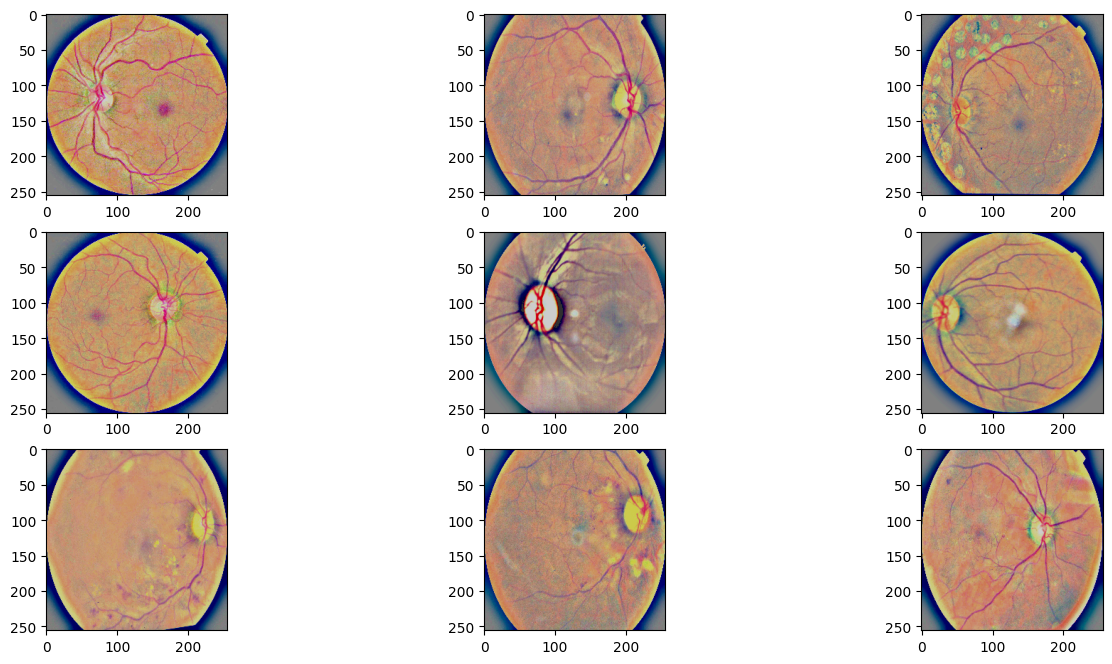

In [41]:
plt.figure(figsize=(16,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[i])

y_test_multi = np.empty(y_test.shape, dtype=y_test.dtype)
y_test_multi[:, 4] = y_test[:, 4]

for i in range(3, -1, -1):
    y_test_multi[:, i] = np.logical_or(y_test[:, i], y_test_multi[:, i+1])

print("Original y_test:", y_test.sum(axis=0))
print("Multilabel version:", y_test_multi.sum(axis=0))

In [14]:
y_val_multi = np.empty(y_val.shape, dtype=y_val.dtype)
y_val_multi[:, 4] = y_val[:, 4]

for i in range(3, -1, -1):
    y_val_multi[:, i] = np.logical_or(y_val[:, i], y_val_multi[:, i+1])

print("Original y_valid:", y_val.sum(axis=0))
print("Multilabel version:", y_val_multi.sum(axis=0))

Original y_valid: [172  40 104  22  28]
Multilabel version: [366 194 154  50  28]


In [43]:
np.save('y_test1.npy',y_test_multi)
np.save('x_test1.npy',x_test)

In [15]:
np.save('y_valid.npy',y_val_multi)
np.save('x_valid.npy',x_valid)